#### Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly as ply
import os
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [2]:
df=pd.read_excel('SCM_AUG_SEP.xlsx')

In [3]:
df.head(2)

,Bugged,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Root Cause,SR,Known Issue,Reason Code,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Closed
0,No,2-Significant,Oracle Platform Cloud,Internet of Things Cloud Service,11268,Internet of Things Cloud Service,Connected Worker,Generic Issues,18.2.3,Cloud-Implementation,1,No,"14 Undetermined,Cust Abandoned",can't use google from inside oracle network,Closed,Not Entitled,2018-08-03 01:39:45,2017-05-06 03:34:25,454,2018-08-02 19:39:28
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10402,Oracle Fusion Inventory Management Cloud Service,Financial Orchestration,Other Setup Tasks,11.12.1.0.0,Cloud-Post Go Live,2,Unspecified,12 Usability/Training-End User,Intercompany ap invoice accrual account is not...,Closed,Resolved with Solution,2018-08-17 12:42:31,2017-07-15 19:47:15,391,2018-08-10 10:07:55


In [4]:
print(len(df.index))
print(len(df))

9505
9505


In [5]:
df.columns=df.columns.astype('str')

In [6]:
list(df.columns)

['Bugged',
 'Severity',
 'Product Family',
 'Product Area',
 'Product ID',
 'Product',
 'Component',
 'Sub Component',
 'Product Version',
 'Root Cause',
 'SR',
 'Known Issue',
 'Reason Code',
 'Summary',
 'Status',
 'Substatus',
 'Last Updated On',
 'Date Opened',
 'Days Open',
 'Date Closed']

In [7]:
#df=df.drop_duplicates().reset_index(drop=True)

df=df.drop_duplicates().reset_index(drop=True)

In [8]:
df.head(2)

,Bugged,Severity,Product Family,Product Area,Product ID,Product,Component,Sub Component,Product Version,Root Cause,SR,Known Issue,Reason Code,Summary,Status,Substatus,Last Updated On,Date Opened,Days Open,Date Closed
0,No,2-Significant,Oracle Platform Cloud,Internet of Things Cloud Service,11268,Internet of Things Cloud Service,Connected Worker,Generic Issues,18.2.3,Cloud-Implementation,1,No,"14 Undetermined,Cust Abandoned",can't use google from inside oracle network,Closed,Not Entitled,2018-08-03 01:39:45,2017-05-06 03:34:25,454,2018-08-02 19:39:28
1,No,2-Significant,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,10402,Oracle Fusion Inventory Management Cloud Service,Financial Orchestration,Other Setup Tasks,11.12.1.0.0,Cloud-Post Go Live,2,Unspecified,12 Usability/Training-End User,Intercompany ap invoice accrual account is not...,Closed,Resolved with Solution,2018-08-17 12:42:31,2017-07-15 19:47:15,391,2018-08-10 10:07:55


In [9]:
print(len(df.index))

9505


In [10]:
df.columns=df.columns.astype(str)

In [11]:
print(sum(df['SR'].isna()))
#df=df.loc[df['SR'].dropna()]

#print(sum(df['SR'].isna()))



0


In [12]:
print(sum(df['SR'].isnull()))
#df=df.loc[~df['SR'].isnull()]

#print(sum(df['SR'].isnull()))


0


In [13]:
df.shape[0]

9505

In [14]:
df.dtypes

Bugged             object
Severity           object
Product Family     object
Product Area       object
Product ID         object
Product            object
Component          object
Sub Component      object
Product Version    object
Root Cause         object
SR                  int64
Known Issue        object
Reason Code        object
Summary            object
Status             object
Substatus          object
Last Updated On    object
Date Opened        object
Days Open          object
Date Closed        object
dtype: object

In [15]:
cols_df=list(df.columns)
cols_df

['Bugged',
 'Severity',
 'Product Family',
 'Product Area',
 'Product ID',
 'Product',
 'Component',
 'Sub Component',
 'Product Version',
 'Root Cause',
 'SR',
 'Known Issue',
 'Reason Code',
 'Summary',
 'Status',
 'Substatus',
 'Last Updated On',
 'Date Opened',
 'Days Open',
 'Date Closed']

In [16]:
#df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

df.rename(columns=lambda x: x.replace(' ','_'), inplace=True)

In [17]:
df.columns

Index(['Bugged', 'Severity', 'Product_Family', 'Product_Area', 'Product_ID',
       'Product', 'Component', 'Sub_Component', 'Product_Version',
       'Root_Cause', 'SR', 'Known_Issue', 'Reason_Code', 'Summary', 'Status',
       'Substatus', 'Last_Updated_On', 'Date_Opened', 'Days_Open',
       'Date_Closed'],
      dtype='object')

In [18]:
df.head(2)
df.dtypes

Bugged             object
Severity           object
Product_Family     object
Product_Area       object
Product_ID         object
Product            object
Component          object
Sub_Component      object
Product_Version    object
Root_Cause         object
SR                  int64
Known_Issue        object
Reason_Code        object
Summary            object
Status             object
Substatus          object
Last_Updated_On    object
Date_Opened        object
Days_Open          object
Date_Closed        object
dtype: object

In [19]:
df.Product_ID=df.Product_ID.apply(lambda x : str(x))
df.SR=df.SR.apply(lambda x : str(x))

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9505 entries, 0 to 9504
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Bugged           9505 non-null   object
 1   Severity         9505 non-null   object
 2   Product_Family   9505 non-null   object
 3   Product_Area     9505 non-null   object
 4   Product_ID       9505 non-null   object
 5   Product          9505 non-null   object
 6   Component        9505 non-null   object
 7   Sub_Component    9505 non-null   object
 8   Product_Version  9160 non-null   object
 9   Root_Cause       9505 non-null   object
 10  SR               9505 non-null   object
 11  Known_Issue      9505 non-null   object
 12  Reason_Code      9505 non-null   object
 13  Summary          9505 non-null   object
 14  Status           9505 non-null   object
 15  Substatus        9505 non-null   object
 16  Last_Updated_On  9505 non-null   object
 17  Date_Opened      9505 non-null   

In [21]:
def uniq(x):
    print(len(x.unique()))

In [22]:
df.Bugged.unique()

array(['No', '2-Significant', 'Supply Chain Management', 12813, 'Yes'],
      dtype=object)

In [23]:
uniq(df.Product)
uniq(df.Product_Area)
uniq(df.Product_Family)
uniq(df.Product_ID)
uniq(df.Product_Version)
uniq(df.Component)
uniq(df.Sub_Component)
uniq(df.Severity)

61
20
9
61
29
173
438
8


In [24]:
df['Product_Family'].unique()

array(['Oracle Platform Cloud', 'Oracle Software Cloud', 'Procurement',
       'Supply Chain Management', 'Customer Relationship Management',
       2476, 'Developer Tools', 'Data Collection',
       'Oracle Enterprise Resource Planning Cloud'], dtype=object)

#### Product_ID and Product are interrelated, hence we can drop off Product_ID
#### Every Product belongs to a Product_Family
#### Product_Version seems less important as it has no use in analysis

In [25]:
df.Bugged=df.Bugged.astype('category')

In [26]:
print(sum(df.Bugged=='2-Significant'))
print(sum(df.Bugged=='Supply Chain Management'))
print(sum(df.Bugged==12813))

2
1
1


In [27]:
df=df[~df.Bugged.isin(['2-Significant','Supply Chain Management',12813])]

In [28]:
df.Bugged.unique()

[No, Yes]
Categories (2, object): [No, Yes]

In [29]:
len(df.index)

9501

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [31]:
le=LabelEncoder()
ose=OneHotEncoder()

In [32]:
df.Severity=df.Severity.apply(lambda x : int(x[0]))

In [33]:
df.SR=df.SR.apply(lambda x : str(x))

In [34]:
df=df.drop(columns=['Product_ID','Product_Version','SR','Last_Updated_On'])

In [35]:
df.head(2)

,Bugged,Severity,Product_Family,Product_Area,Product,Component,Sub_Component,Root_Cause,Known_Issue,Reason_Code,Summary,Status,Substatus,Date_Opened,Days_Open,Date_Closed
0,No,2,Oracle Platform Cloud,Internet of Things Cloud Service,Internet of Things Cloud Service,Connected Worker,Generic Issues,Cloud-Implementation,No,"14 Undetermined,Cust Abandoned",can't use google from inside oracle network,Closed,Not Entitled,2017-05-06 03:34:25,454,2018-08-02 19:39:28
1,No,2,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Inventory Management Cloud Service,Financial Orchestration,Other Setup Tasks,Cloud-Post Go Live,Unspecified,12 Usability/Training-End User,Intercompany ap invoice accrual account is not...,Closed,Resolved with Solution,2017-07-15 19:47:15,391,2018-08-10 10:07:55


In [36]:
df['Bugged'].value_counts()

No                         7512
Yes                        1989
Supply Chain Management       0
2-Significant                 0
12813                         0
Name: Bugged, dtype: int64

In [37]:
df.head(2)

,Bugged,Severity,Product_Family,Product_Area,Product,Component,Sub_Component,Root_Cause,Known_Issue,Reason_Code,Summary,Status,Substatus,Date_Opened,Days_Open,Date_Closed
0,No,2,Oracle Platform Cloud,Internet of Things Cloud Service,Internet of Things Cloud Service,Connected Worker,Generic Issues,Cloud-Implementation,No,"14 Undetermined,Cust Abandoned",can't use google from inside oracle network,Closed,Not Entitled,2017-05-06 03:34:25,454,2018-08-02 19:39:28
1,No,2,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Inventory Management Cloud Service,Financial Orchestration,Other Setup Tasks,Cloud-Post Go Live,Unspecified,12 Usability/Training-End User,Intercompany ap invoice accrual account is not...,Closed,Resolved with Solution,2017-07-15 19:47:15,391,2018-08-10 10:07:55


In [38]:


df.iloc[:,0]=le.fit_transform(df.iloc[:,0])
df.iloc[:,11]=le.fit_transform(df.iloc[:,11])


In [39]:
df.iloc[:,0]=le.fit_transform(df.iloc[:,0])

In [40]:
df.head()

,Bugged,Severity,Product_Family,Product_Area,Product,Component,Sub_Component,Root_Cause,Known_Issue,Reason_Code,Summary,Status,Substatus,Date_Opened,Days_Open,Date_Closed
0,0,2,Oracle Platform Cloud,Internet of Things Cloud Service,Internet of Things Cloud Service,Connected Worker,Generic Issues,Cloud-Implementation,No,"14 Undetermined,Cust Abandoned",can't use google from inside oracle network,0,Not Entitled,2017-05-06 03:34:25,454,2018-08-02 19:39:28
1,0,2,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Inventory Management Cloud Service,Financial Orchestration,Other Setup Tasks,Cloud-Post Go Live,Unspecified,12 Usability/Training-End User,Intercompany ap invoice accrual account is not...,0,Resolved with Solution,2017-07-15 19:47:15,391,2018-08-10 10:07:55
2,0,2,Procurement,Procurement,Oracle Fusion Purchasing Cloud Service,Purchasing Setup,Common Procurement Configuration,Cloud-Implementation,Yes,02 Enhancement Requests,"[IMPL SPT]Customer,BankOfAmerica wants to know...",0,Enhancement Request,2017-12-04 05:26:42,252,2018-08-13 13:31:59
3,0,4,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Product Development Cloud Service,New Item Requests and Change Orders1,Manage Change Orders1,Cloud-Implementation,Yes,02 Enhancement Requests,[ER 27439011] Unable to create Multilist attri...,0,Enhancement Request,2018-01-11 13:39:06,223,2018-08-22 17:30:20
4,0,4,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,Oracle Fusion Cost Management Cloud Service,Landed Cost Management,Manage Trade Operations,Cloud-Post Go Live,Unspecified,07 Setup / Configuration,Error ORA-00001: unique constraint (FUSION.CML...,0,Resolved with Solution,2018-02-09 14:44:46,187,2018-08-15 15:29:51


In [41]:
df=df.drop_duplicates()

In [42]:
list(df.Root_Cause.unique())

['Cloud-Implementation',
 'Cloud-Post Go Live',
 'Cust Engmt - Customer/Partner',
 'Cloud-Provisioning',
 'Cloud-Special Events',
 'Software-Install',
 'Software-Maintain',
 'Software-Upgrade',
 'Cust Engmt - Development',
 'Cust Engmt - Support',
 'Hardware']

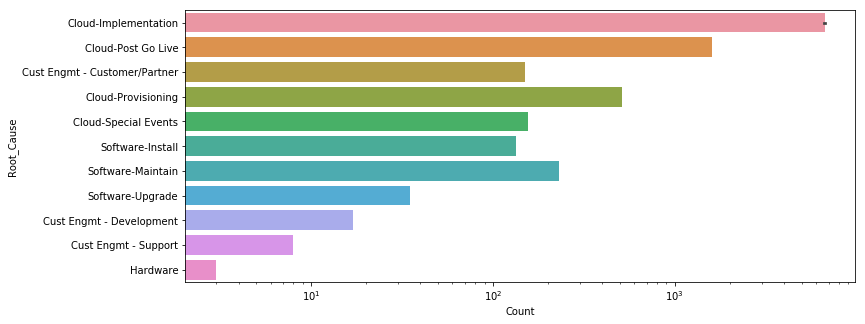

In [71]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.Root_Cause.index,y=df.Root_Cause,estimator=np.count_nonzero)
plt.xlabel('Count')
plt.xscale('log')

In [72]:
print(100*(sum(df.Root_Cause=='Cloud-Post Go Live')/len(df.index)))
print(100*(sum(df.Root_Cause=='Cloud-Implementation')/len(df.index)))
print(100*(sum(df.Root_Cause=='Cust Engmt - Customer/Partner')/len(df.index)))
print(100*(sum(df.Root_Cause=='Cloud-Provisioning')/len(df.index)))
print(100*(sum(df.Root_Cause=='Cloud-Special Events')/len(df.index)))
print(100*(sum(df.Root_Cause=='Software-Install')/len(df.index)))
print(100*(sum(df.Root_Cause=='Software-Maintain')/len(df.index)))
print(100*(sum(df.Root_Cause=='Software-Upgrade')/len(df.index)))
print(100*(sum(df.Root_Cause=='Cust Engmt - Development')/len(df.index)))
print(100*(sum(df.Root_Cause=='Cust Engmt - Support')/len(df.index)))
print(100*(sum(df.Root_Cause=='Hardware')/len(df.index)))

16.787706557204505
70.04525839385329
1.589306388801179
5.4310072623934325
1.6419324281654564
1.420903062835491
2.4207978107567625
0.36838227554994213
0.1789285338385433
0.08420166298284391
0.031575623618566466


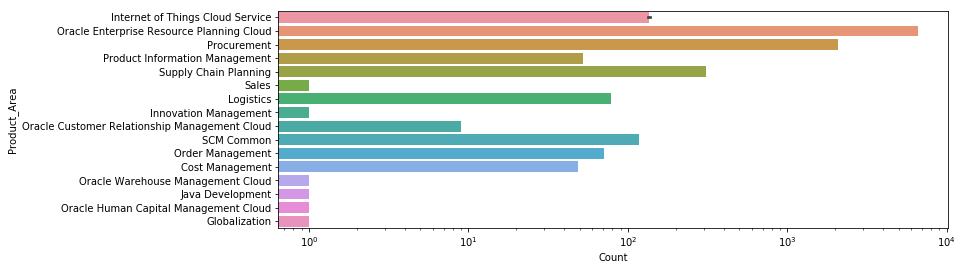

In [73]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.Product_Area.index,y=df.Product_Area,estimator=np.count_nonzero)
plt.xlabel('Count')
plt.xscale('log')

In [74]:
list(df.columns)

['Bugged',
 'Severity',
 'Product_Family',
 'Product_Area',
 'Product',
 'Component',
 'Sub_Component',
 'Root_Cause',
 'Known_Issue',
 'Reason_Code',
 'Summary',
 'Status',
 'Substatus',
 'Date_Opened',
 'Days_Open',
 'Date_Closed']

In [76]:
df_prod_group=df[['Product_Family','Product_Area','Product']].groupby(['Product_Family','Product_Area'],as_index=False).count().sort_values('Product',ascending=False).reset_index(drop=True)

In [77]:
df_prod_group

,Product_Family,Product_Area,Product
0,Oracle Software Cloud,Oracle Enterprise Resource Planning Cloud,6578
1,Procurement,Procurement,2092
2,Supply Chain Management,Supply Chain Planning,311
3,Oracle Platform Cloud,Internet of Things Cloud Service,137
4,Supply Chain Management,SCM Common,117
5,Supply Chain Management,Logistics,79
6,Supply Chain Management,Order Management,71
7,Supply Chain Management,Product Information Management,52
8,Supply Chain Management,Cost Management,49
9,Oracle Software Cloud,Oracle Customer Relationship Management Cloud,9


In [78]:
df_component_group=df[['Component','Sub_Component']].groupby(['Component'],as_index=False).count().sort_values('Sub_Component',ascending=False).reset_index(drop=True)

In [79]:
df_component_group.head(50)

,Component,Sub_Component
0,Manage Orders,1101
1,Purchase Orders,854
2,Inventory,558
3,Cost Management,506
4,Approvals and Notification,433
5,Create Requisition,313
6,Order Management Setup,284
7,Purchasing Setup,266
8,Approve Requisition,265
9,Item Management,242


In [80]:
100*(sum(df_component_group.Sub_Component[:10])/len(df.index))

50.752552362909164

In [81]:
df.Date_Opened.dtype

dtype('O')

In [82]:
df['Product_Family'].unique()

array(['Oracle Platform Cloud', 'Oracle Software Cloud', 'Procurement',
       'Supply Chain Management', 'Customer Relationship Management',
       'Developer Tools'], dtype=object)

In [83]:
import time
from time import mktime
from datetime import datetime

In [84]:
df['Time']=df.Date_Opened.dt.time

In [85]:
print('Severity - 1 : ', sum(df.Severity==1))
print('Severity - 2 : ', sum(df.Severity==2))
print('Severity - 3 : ', sum(df.Severity==3))
print('Severity - 4 : ', sum(df.Severity==4))

Severity - 1 :  891
Severity - 2 :  6724
Severity - 3 :  1598
Severity - 4 :  288


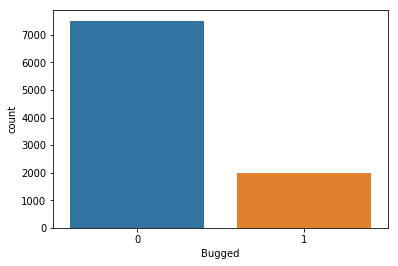

In [86]:
sns.countplot(df.Bugged)

In [87]:
print('Bugged issues : ',sum(df.Bugged==1))
print('Not-Bugged issues : ',sum(df.Bugged==0))

Bugged issues :  1989
Not-Bugged issues :  7512


### Text Anlaysis

In [88]:
df.Summary=df.Summary.apply(lambda x : x.replace('_', ' '))

In [89]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
df_dict=df[['Summary','Reason_Code','Root_Cause']]

In [91]:
df_dict.Reason_Code=df_dict.Reason_Code.replace('-',' ')

C:\Users\adity\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [92]:

df_dict['text'] = df_dict['Summary'].astype(str) + df_dict['Reason_Code'].astype(str)

C:\Users\adity\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [93]:
df_dict=df_dict.drop(columns=['Summary','Reason_Code'])

In [95]:
df_dict.head()

,Root_Cause,text
0,Cloud-Implementation,can't use google from inside oracle network14 ...
1,Cloud-Post Go Live,Intercompany ap invoice accrual account is not...
2,Cloud-Implementation,"[IMPL SPT]Customer,BankOfAmerica wants to know..."
3,Cloud-Implementation,[ER 27439011] Unable to create Multilist attri...
4,Cloud-Post Go Live,Error ORA-00001: unique constraint (FUSION.CML...


In [111]:
data_set = []
for index,row in df_dict.iterrows():
    data_set.append((row['text'], row['Root_Cause']))

In [112]:
data_set[:5]

[("can't use google from inside oracle network14 Undetermined,Cust Abandoned",
  'Cloud-Implementation'),
 ('Intercompany ap invoice accrual account is not populated12 Usability/Training-End User',
  'Cloud-Post Go Live'),
 ('[IMPL SPT]Customer,BankOfAmerica wants to know they can maintain duplicate Suppliers in Supplr Mgmt02 Enhancement Requests',
  'Cloud-Implementation'),
 ('[ER 27439011] Unable to create Multilist attribute type on Change object02 Enhancement Requests',
  'Cloud-Implementation'),
 ('Error ORA-00001: unique constraint (FUSION.CML TOPT CHARGE REF VALUES U1) violated Trade Operation07 Setup / Configuration',
  'Cloud-Post Go Live')]

In [113]:
stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

In [121]:
def preprocess(document, stem=True):
    # change sentence to lower case
    document = document.lower()
    # tokenize into words
    words = word_tokenize(document)
    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    if stem:
        words = [stemmer.stem(word) for word in words]
    else:
        words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    # join words to make sentence
    document = " ".join(words)
    return document



In [128]:
messages_set=[]
for mess,lab in data_set:
    words_filtered=[e.lower() for e in preprocess(mess).split() if len(e)>=3]
    messages_set.append((words_filtered,label))
        

In [124]:
messages_set = []
for message, label in data_set:
    words_filtered = [e.lower() for e in preprocess(message, stem=False).split() if len(e) >= 3]
    messages_set.append((words_filtered, label))

In [129]:
print(messages_set[:1])

[(["n't", 'use', 'googl', 'insid', 'oracl', 'network14', 'undetermin', 'cust', 'abandon'], 'Cloud-Implementation')]


In [130]:
messages_set

[(["n't",
   'use',
   'googl',
   'insid',
   'oracl',
   'network14',
   'undetermin',
   'cust',
   'abandon'],
  'Cloud-Implementation'),
 (['intercompani',
   'invoic',
   'accrual',
   'account',
   'populated12',
   'usability/training-end',
   'user'],
  'Cloud-Implementation'),
 (['impl',
   'spt',
   'custom',
   'bankofamerica',
   'want',
   'know',
   'maintain',
   'duplic',
   'supplier',
   'supplr',
   'mgmt02',
   'enhanc',
   'request'],
  'Cloud-Implementation'),
 (['27439011',
   'unabl',
   'creat',
   'multilist',
   'attribut',
   'type',
   'chang',
   'object02',
   'enhanc',
   'request'],
  'Cloud-Implementation'),
 (['error',
   'ora-00001',
   'uniqu',
   'constraint',
   'fusion.cml',
   'topt',
   'charg',
   'ref',
   'valu',
   'violat',
   'trade',
   'operation07',
   'setup',
   'configur'],
  'Cloud-Implementation'),
 (['27813084-break',
   'secur',
   'polici',
   'manag',
   'item',
   'chang',
   'order',
   'handl',
   'independ',
   'privllege

In [209]:
"""X1=[]
def get_words(messages_set):
    for i in messages_set:
        for j in i[0]:
            X1.append(j)
    return X1"""

'X1=[]\ndef get_words(messages_set):\n    for i in messages_set:\n        for j in i[0]:\n            X1.append(j)\n    return X1'

In [210]:
#X2=get_words(messages_set)

In [211]:
#X2

In [212]:
def get_words_in_messages(messages):
    all_words = []
    for (message, label) in messages:
        all_words.extend(message)
    return all_words

In [213]:
gwm=get_words_in_messages(messages_set)
len(gwm)

78287

In [214]:
gwm

["n't",
 'use',
 'googl',
 'insid',
 'oracl',
 'network14',
 'undetermin',
 'cust',
 'abandon',
 'intercompani',
 'invoic',
 'accrual',
 'account',
 'populated12',
 'usability/training-end',
 'user',
 'impl',
 'spt',
 'custom',
 'bankofamerica',
 'want',
 'know',
 'maintain',
 'duplic',
 'supplier',
 'supplr',
 'mgmt02',
 'enhanc',
 'request',
 '27439011',
 'unabl',
 'creat',
 'multilist',
 'attribut',
 'type',
 'chang',
 'object02',
 'enhanc',
 'request',
 'error',
 'ora-00001',
 'uniqu',
 'constraint',
 'fusion.cml',
 'topt',
 'charg',
 'ref',
 'valu',
 'violat',
 'trade',
 'operation07',
 'setup',
 'configur',
 '27813084-break',
 'secur',
 'polici',
 'manag',
 'item',
 'chang',
 'order',
 'handl',
 'independ',
 'privlleges02',
 'enhanc',
 'request',
 'cost',
 'processor',
 'end',
 'warning12',
 'usability/training-end',
 'user',
 'import',
 'file',
 'succesful',
 'owner',
 'spoke',
 'system',
 'child',
 'levelcustom',
 'product',
 'knowledg',
 'autoinvoic',
 'honor',
 'timezon',
 's

In [215]:
gwm[:5]

["n't", 'use', 'googl', 'insid', 'oracl']

In [216]:
import nltk

In [217]:
#X2=pd.DataFrame(pd.Series(gwm).value_counts())

In [218]:
#X2

In [219]:
word_dict=nltk.FreqDist(get_words_in_messages(messages_set))
word_dict

FreqDist({'setup': 3972, 'configur': 3972, 'order': 1589, 'error': 1192, 'request': 1108, 'item': 1032, 'product': 958, 'creat': 915, 'user': 885, 'enhanc': 872, ...})

In [77]:
wldf=pd.DataFrame.from_dict(word_dict,orient='index')
wldf=wldf.reset_index()
wldf.columns=wldf.columns.astype('str')
wldf=wldf.rename(columns={'index':'word','0':'freq'})
wldf=wldf.sort_values(['freq'],ascending=False).reset_index(drop=True)

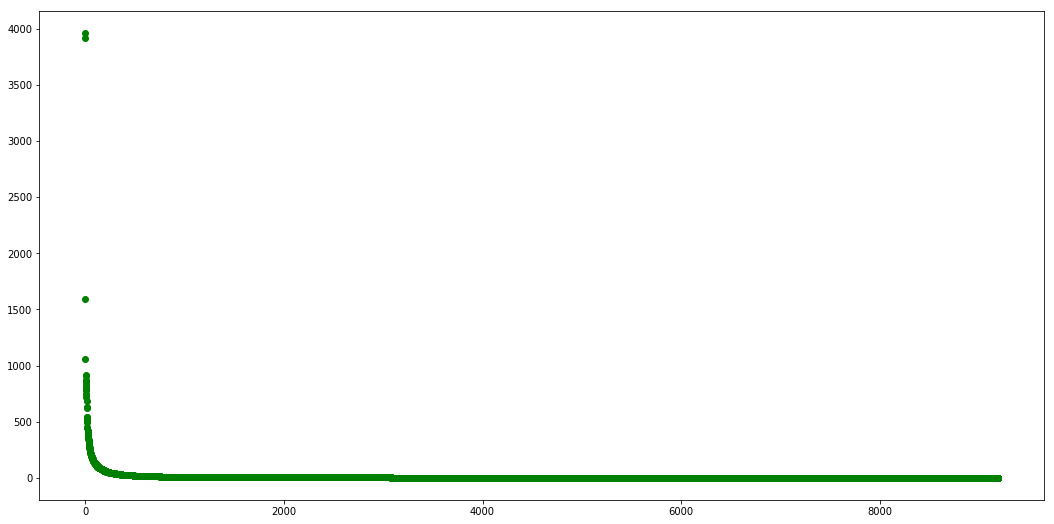

In [78]:
plt.figure(figsize=(18,9))
plt.scatter(x=wldf.index,y=wldf.freq,c='g')
#plt.yscale('log')

In [221]:
def get_word_features(wordlist):
    #print(wordlist[:10])
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

In [222]:
word_features = get_word_features(get_words_in_messages(messages_set))
print(len(word_features))

8703


In [223]:
word_features

dict_keys(["n't", 'use', 'googl', 'insid', 'oracl', 'network14', 'undetermin', 'cust', 'abandon', 'intercompani', 'invoic', 'accrual', 'account', 'populated12', 'usability/training-end', 'user', 'impl', 'spt', 'custom', 'bankofamerica', 'want', 'know', 'maintain', 'duplic', 'supplier', 'supplr', 'mgmt02', 'enhanc', 'request', '27439011', 'unabl', 'creat', 'multilist', 'attribut', 'type', 'chang', 'object02', 'error', 'ora-00001', 'uniqu', 'constraint', 'fusion.cml', 'topt', 'charg', 'ref', 'valu', 'violat', 'trade', 'operation07', 'setup', 'configur', '27813084-break', 'secur', 'polici', 'manag', 'item', 'order', 'handl', 'independ', 'privlleges02', 'cost', 'processor', 'end', 'warning12', 'import', 'file', 'succesful', 'owner', 'spoke', 'system', 'child', 'levelcustom', 'product', 'knowledg', 'autoinvoic', 'honor', 'timezon', 'setting14', 'split', 'requisit', 'line', 'process', 'requist', 'screen', '...', 'get', 'defect', 'detail', 'report', 'friendli', 'mani', 'affect', 'objects14', 

In [224]:
messages_set

[(["n't",
   'use',
   'googl',
   'insid',
   'oracl',
   'network14',
   'undetermin',
   'cust',
   'abandon'],
  'Cloud-Implementation'),
 (['intercompani',
   'invoic',
   'accrual',
   'account',
   'populated12',
   'usability/training-end',
   'user'],
  'Cloud-Implementation'),
 (['impl',
   'spt',
   'custom',
   'bankofamerica',
   'want',
   'know',
   'maintain',
   'duplic',
   'supplier',
   'supplr',
   'mgmt02',
   'enhanc',
   'request'],
  'Cloud-Implementation'),
 (['27439011',
   'unabl',
   'creat',
   'multilist',
   'attribut',
   'type',
   'chang',
   'object02',
   'enhanc',
   'request'],
  'Cloud-Implementation'),
 (['error',
   'ora-00001',
   'uniqu',
   'constraint',
   'fusion.cml',
   'topt',
   'charg',
   'ref',
   'valu',
   'violat',
   'trade',
   'operation07',
   'setup',
   'configur'],
  'Cloud-Implementation'),
 (['27813084-break',
   'secur',
   'polici',
   'manag',
   'item',
   'chang',
   'order',
   'handl',
   'independ',
   'privllege

In [228]:
#training_data=int(len(messages_set)*0.75)

In [229]:
sliceIndex = int((len(messages_set)*.75))

In [230]:
import random
random.shuffle(messages_set)

In [231]:
train_messages, test_messages = messages_set[:sliceIndex], messages_set[sliceIndex:]

In [232]:
print(len(train_messages))
print(len(test_messages))

7125
2376


In [233]:
train_messages[0]

(['unabl', 'creat', 'assign', 'set07', 'setup', 'configur'],
 'Cloud-Implementation')

In [234]:
test_messages[0]

(['purchas',
  'order',
  'report',
  'gener',
  'spanish',
  'english07',
  'setup',
  'configur'],
 'Cloud-Implementation')

In [249]:
def extract_features(document):
    document_words = set(document)
    print(document_words)
    #features = {}
    #for word in word_features:
    #    features['contains(%s)' % word] = (word in document_words)
    #return features

In [250]:
training_set = nltk.classify.apply_features(extract_features, train_messages)
testing_set = nltk.classify.apply_features(extract_features, test_messages)

In [251]:
training_set

{'setup', 'set07', 'assign', 'unabl', 'configur', 'creat'}
{'requisit', 'custom', 'email', 'setup', 'notification07', 'approv', 'configur'}
{'ppm', 'misc', 'import', 'inventori', 'managementundetermin', 'cloud', 'issu', 'cost', 'get', 'project'}


[(None, 'Cloud-Implementation'), (None, 'Cloud-Implementation'), ...]

In [244]:
print('Training set size : ', len(training_set))
print('Test set size : ', len(testing_set))

Training set size :  7125
Test set size :  2376


In [245]:
ProdClassifier = nltk.NaiveBayesClassifier.train(training_set)

In [246]:
print(nltk.classify.accuracy(ProdClassifier, training_set))


KeyboardInterrupt: 

In [ ]:
print(nltk.classify.accuracy(ProdClassifier, testing_set))

In [ ]:
print(ProdClassifier.show_most_informative_features(50))